In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\Raghavendra K\Downloads\dataset_1\MFGEmployees4.csv")

# Drop non-numeric columns and the target variable
X = df.drop(['AbsentHours', 'EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit'], axis=1)
y = df['AbsentHours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regressor (MLR)
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred_mlr = mlr_model.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = mse_mlr ** 0.5
r2_mlr = r2_score(y_test, y_pred_mlr)

# Random Forest Regressor (RFR)
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = mse_rfr ** 0.5
r2_rfr = r2_score(y_test, y_pred_rfr)

# MLR with PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the appropriate number of components
n_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

mlr_pca_model = LinearRegression()
mlr_pca_model.fit(X_train_pca, y_train)
y_pred_mlr_pca = mlr_pca_model.predict(X_test_pca)
mse_mlr_pca = mean_squared_error(y_test, y_pred_mlr_pca)
rmse_mlr_pca = mse_mlr_pca ** 0.5
r2_mlr_pca = r2_score(y_test, y_pred_mlr_pca)



In [9]:
# RFR with PCA
# Determine the appropriate number of components
n_components_rfr = min(X_train_scaled.shape[0], X_train_scaled.shape[1])

pca_rfr = PCA(n_components=n_components_rfr)
X_train_pca_rfr = pca_rfr.fit_transform(X_train_scaled)
X_test_pca_rfr = pca_rfr.transform(X_test_scaled)

rfr_pca_model = RandomForestRegressor()
rfr_pca_model.fit(X_train_pca_rfr, y_train)
y_pred_rfr_pca = rfr_pca_model.predict(X_test_pca_rfr)
mse_rfr_pca = mean_squared_error(y_test, y_pred_rfr_pca)
rmse_rfr_pca = mse_rfr_pca ** 0.5
r2_rfr_pca = r2_score(y_test, y_pred_rfr_pca)


In [10]:
# Print metrics for MLR
print("Multiple Linear Regressor (MLR):")
print(f"MSE: {mse_mlr}")
print(f"RMSE: {rmse_mlr}")
print(f"R^2 Score: {r2_mlr}")
print("\n")

# Print metrics for RFR
print("Random Forest Regressor (RFR):")
print(f"MSE: {mse_rfr}")
print(f"RMSE: {rmse_rfr}")
print(f"R^2 Score: {r2_rfr}")
print("\n")

# Print metrics for MLR with PCA
print("Multiple Linear Regressor with PCA (MLR PCA):")
print(f"MSE: {mse_mlr_pca}")
print(f"RMSE: {rmse_mlr_pca}")
print(f"R^2 Score: {r2_mlr_pca}")
print("\n")

# Print metrics for RFR with PCA
print("Random Forest Regressor with PCA (RFR PCA):")
print(f"MSE: {mse_rfr_pca}")
print(f"RMSE: {rmse_rfr_pca}")
print(f"R^2 Score: {r2_rfr_pca}")


Multiple Linear Regressor (MLR):
MSE: 744.602010930009
RMSE: 27.28739655830158
R^2 Score: 0.6719303768393601


Random Forest Regressor (RFR):
MSE: 820.8567825760863
RMSE: 28.650598293510143
R^2 Score: 0.6383327316129079


Multiple Linear Regressor with PCA (MLR PCA):
MSE: 744.6020109300089
RMSE: 27.28739655830158
R^2 Score: 0.6719303768393601


Random Forest Regressor with PCA (RFR PCA):
MSE: 823.4708325216498
RMSE: 28.6961814972245
R^2 Score: 0.637180988308464


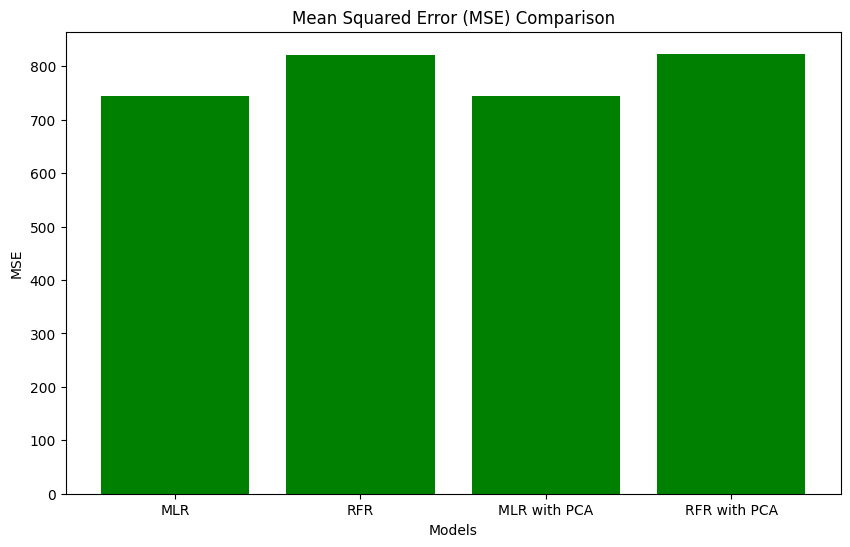

In [11]:
# Assuming models' performance metrics are available
import matplotlib.pyplot as plt
models = ['MLR', 'RFR', 'MLR with PCA', 'RFR with PCA']
mse_values = [mse_mlr, mse_rfr, mse_mlr_pca, mse_rfr_pca]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='green')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

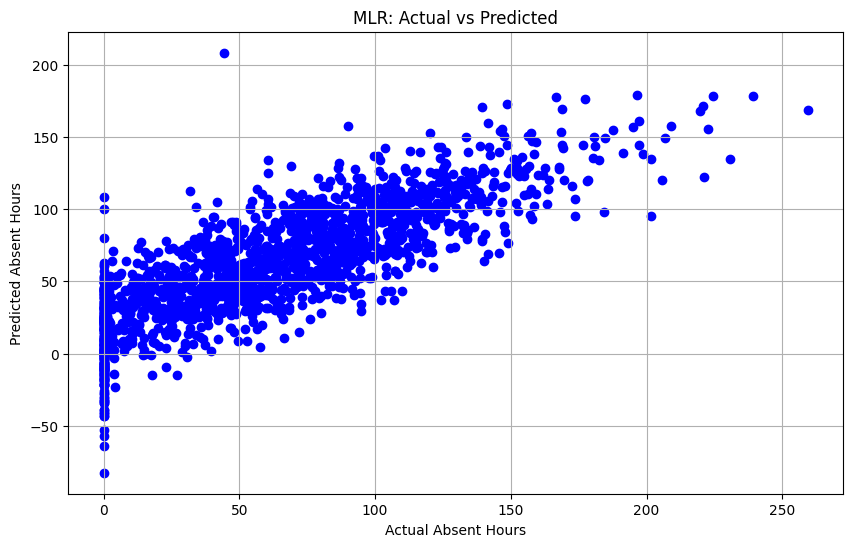

In [12]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available for MLR model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlr, color='blue')
plt.title('MLR: Actual vs Predicted')
plt.xlabel('Actual Absent Hours')
plt.ylabel('Predicted Absent Hours')
plt.grid(True)
plt.show()